In [1]:
import sys 
from tools_tolgay import constants

import numpy as np 
import pandas as pd 

base_dir = "/scratch/dtolgay/cloudy_runs/z_0/cr_1_CO87_CII_H_O3/cr_1_CO87_CII_H_O3_metallicity_above_minus_2"

import matplotlib.pyplot as plt 

# Functions

In [2]:
def find_converged_run(cloudy_em_str: np.ndarray, threshold: float = 0) -> np.ndarray:
    """
    To use the coverged value, I will look at the radius values in the file. If radius decreases to initial radius and simulations
    ran one more time starting from the beginning then it means that in the first run it is not coverged and simulation was run again
    Second run gives the converged value. Use the second run.
    """

    index = 0
    for i in range(len(cloudy_em_str) - 1):
        if (cloudy_em_str[i][0] - cloudy_em_str[i + 1][0]) > threshold:
            index = i + 1

    cloudy_em_str = cloudy_em_str[index:]

    return cloudy_em_str


def read_emissivity_file(base_dir, file_props):
    
    emissivity_columns = [
        "depth",
        "lya",    # [erg/cm3/s]
        "ha",
        "hb",
        "co_10",
        "co_21",
        "co_32",
        "co_43",
        "co_54",
        "co_65",
        "co_76",
        "co_87",
        "13co",
        "c2",
        "o3_88", 
        "o3_5006", 
        "o3_4958",    
    ]    
    
    fname = f"hden{file_props['log_hden']:.5f}_metallicity{file_props['log_metallicity']:.5f}_turbulence{file_props['log_turbulence']:.5f}_isrf{file_props['log_isrf']:.5f}_radius{file_props['log_radius']:.5f}"
    
    emissivity_file = np.loadtxt(f"{base_dir}/{fname}/{fname}_em.str")
    emissivity_file = find_converged_run(emissivity_file)
    emissivity_file = pd.DataFrame(emissivity_file, columns=emissivity_columns)
    emissivity_file['column_density'] = emissivity_file['depth'] * (10**file_props['log_hden'] * constants.proton_mass * constants.kg2g) # g / cm2    
    
    return emissivity_file

# Main

In [3]:
center_columns = ["metallicity", "hden", "turbulence", "isrf", "radius"]
flux_columns = [
    "lya", # [erg s^-1 cm^-2]
    "ha", # [erg s^-1 cm^-2]
    "hb", # [erg s^-1 cm^-2]
    "co_10", # [erg s^-1 cm^-2]
    "co_21", # [erg s^-1 cm^-2]
    "co_32", # [erg s^-1 cm^-2]
    "co_43", # [erg s^-1 cm^-2]
    "co_54", # [erg s^-1 cm^-2]
    "co_65", # [erg s^-1 cm^-2]
    "co_76", # [erg s^-1 cm^-2]
    "co_87", # [erg s^-1 cm^-2]
    "13co", # [erg s^-1 cm^-2]
    "c2", # [erg s^-1 cm^-2]
    "o3_88", # [erg s^-1 cm^-2]
    "o3_5006", # [erg s^-1 cm^-2]
    "o3_4958", # [erg s^-1 cm^-2]    
]
flux_columns = center_columns + flux_columns


line_fluxes = pd.DataFrame(
    np.loadtxt(f"{base_dir}/I_line_values_without_reversing_2.txt"),
    columns = flux_columns
)

In [4]:
for column in center_columns:
    print(f"{column}: {line_fluxes[column].unique()}")


metallicity: [-2.  -1.5 -1.  -0.5  0.   0.5  1. ]
hden: [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
turbulence: [-3. -2. -1.  0.  1.  2.  3.]
isrf: [-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5  5. ]
radius: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


In [5]:
log_hden = 2
log_metallicity = 1
log_turbulence = 1
log_isrf = -0.5
log_radius = 2

file_props_1 = {
    "log_hden": log_hden,
    "log_metallicity": log_metallicity,
    "log_turbulence": -2,
    "log_isrf": log_isrf,
    "log_radius": log_radius,
}
low = read_emissivity_file(base_dir, file_props=file_props_1)


file_props_2 = {
    "log_hden": log_hden,
    "log_metallicity": log_metallicity,
    "log_turbulence": 2,
    "log_isrf": log_isrf,
    "log_radius": log_radius,
}
high = read_emissivity_file(base_dir, file_props=file_props_2)



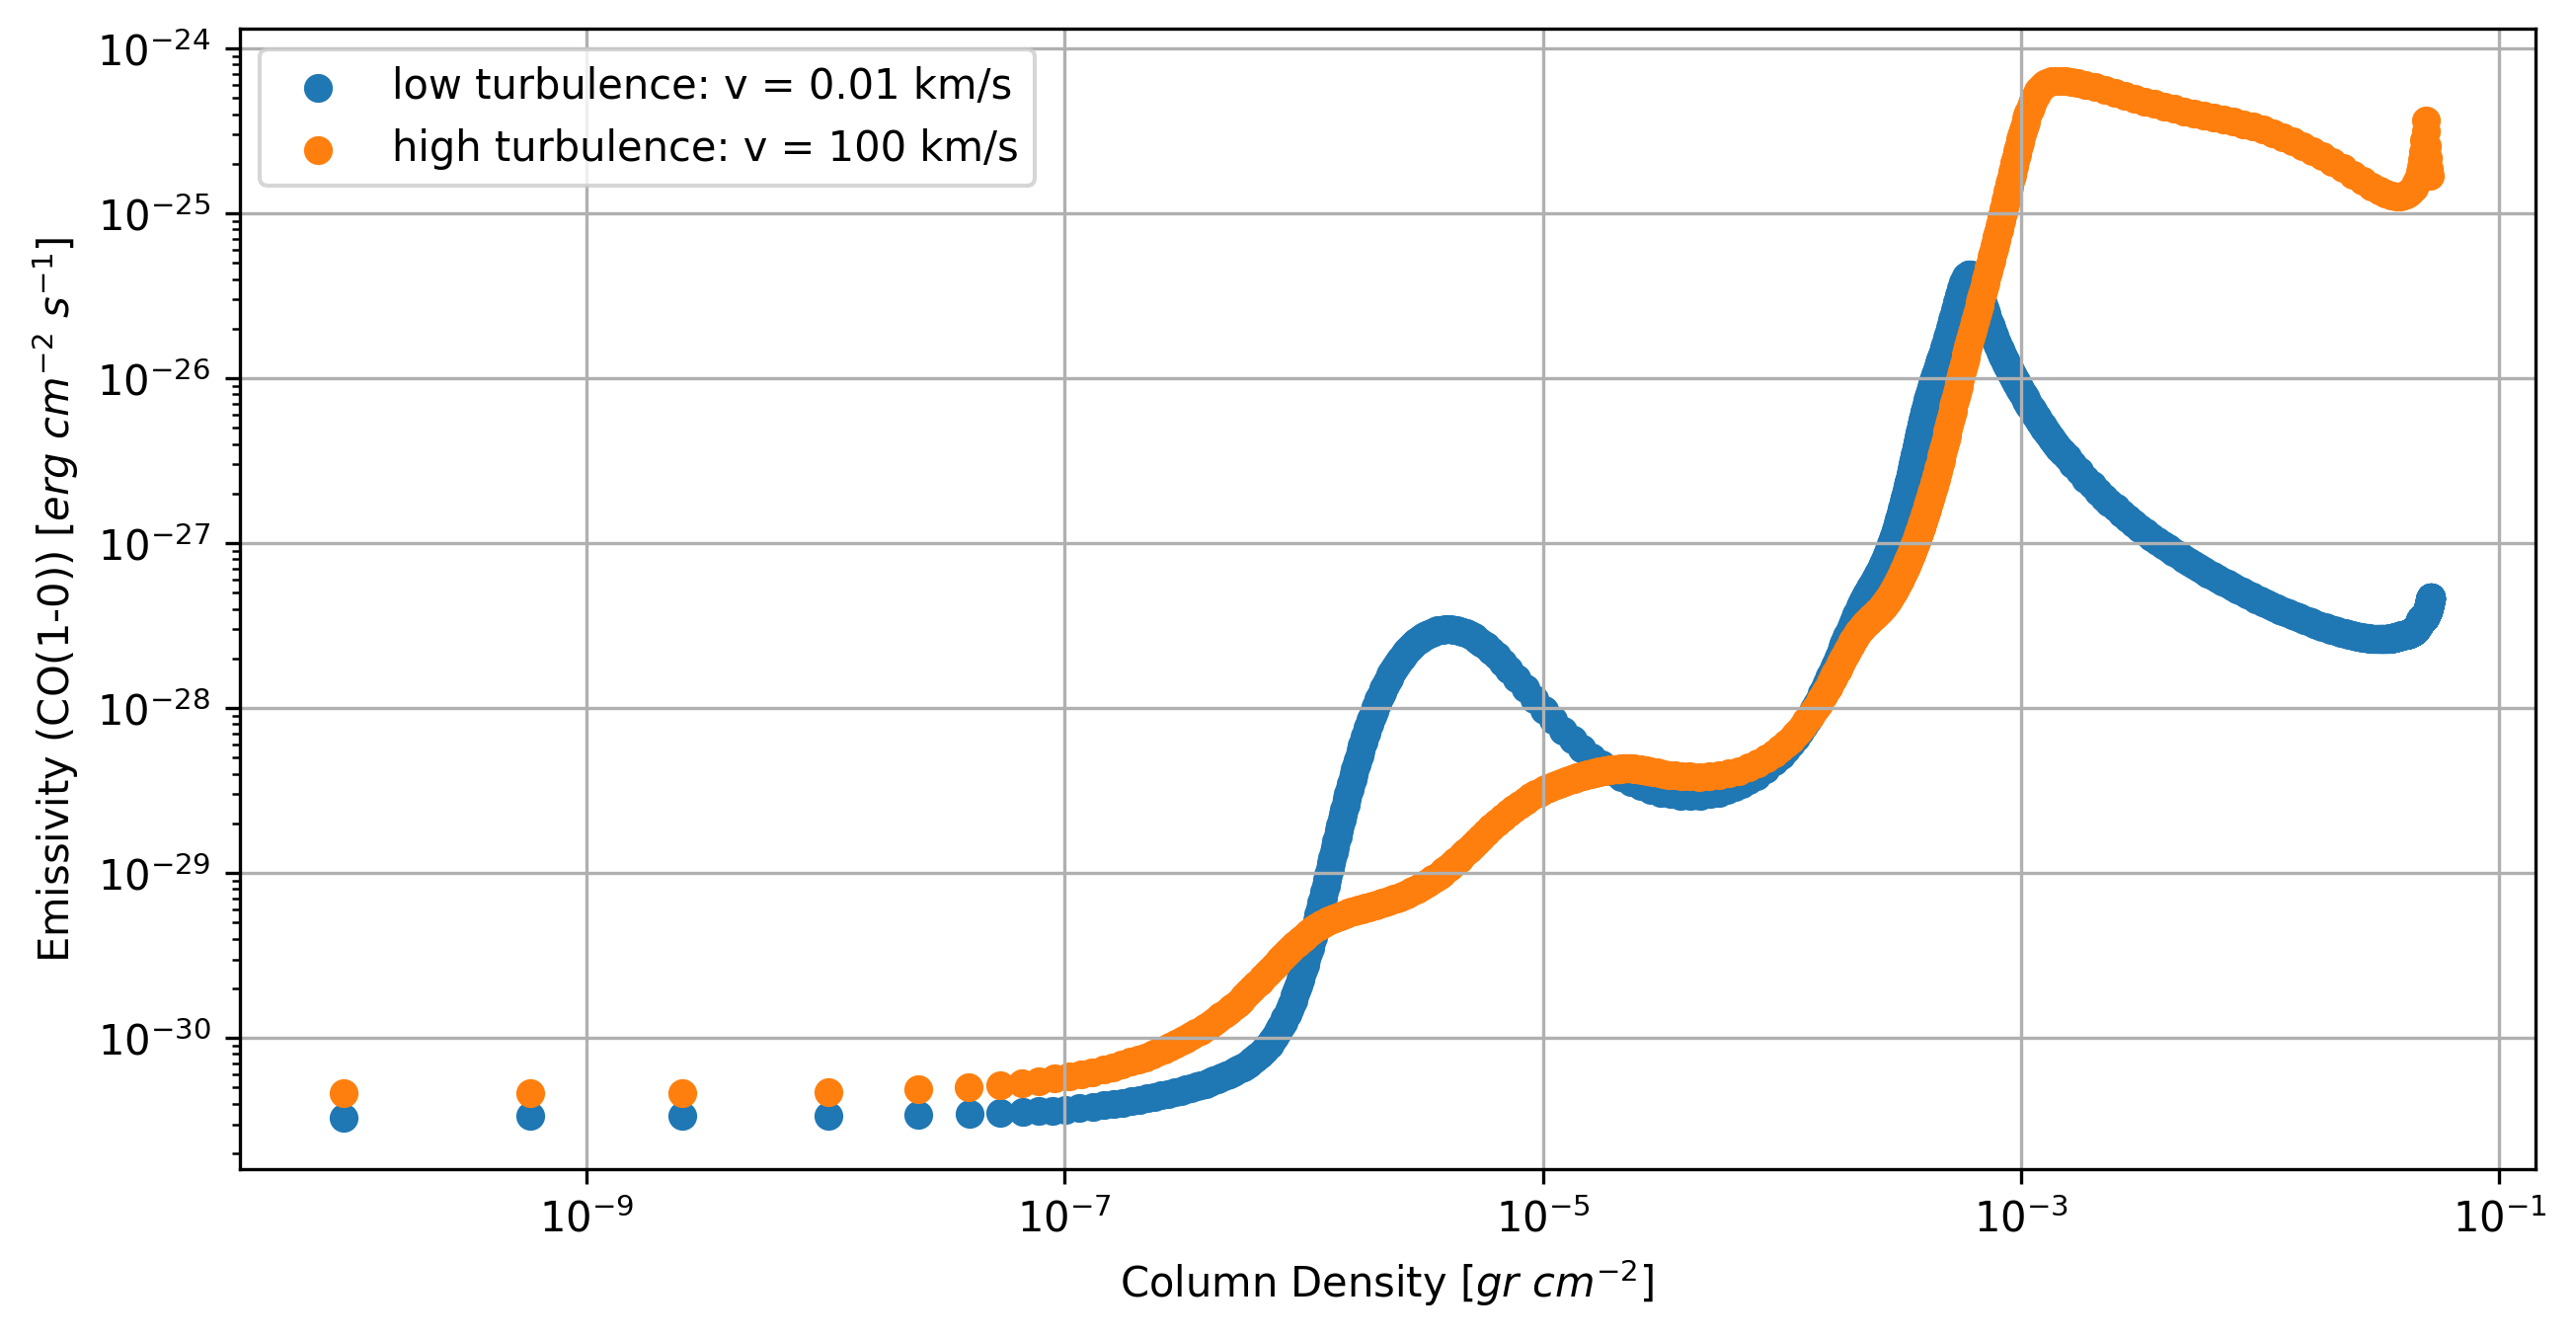

In [6]:
plt.figure(figsize=(10,5), dpi=300)
plt.scatter(low['column_density'], low['co_10'], label="low turbulence: v = 0.01 km/s")
plt.scatter(high['column_density'], high['co_10'], label="high turbulence: v = 100 km/s")

plt.xlabel(r"Column Density [$gr$ $cm^{-2}$]")
plt.ylabel(r"Emissivity (CO(1-0)) [$erg$ $cm^{-2}$ $s^{-1}$]")

plt.xscale("log")
plt.yscale("log")
plt.grid(True)
plt.legend(loc="upper left")

plt.show()

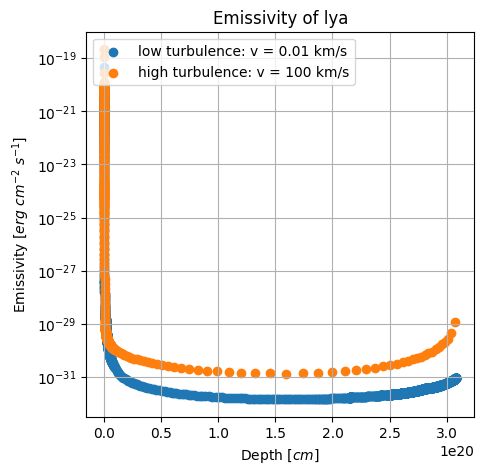

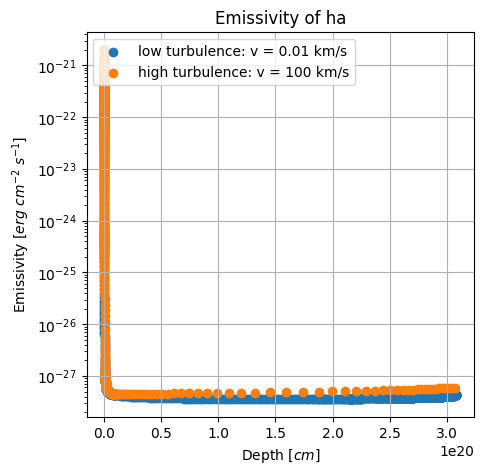

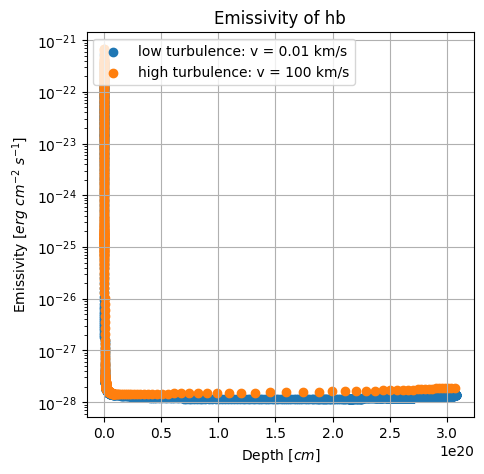

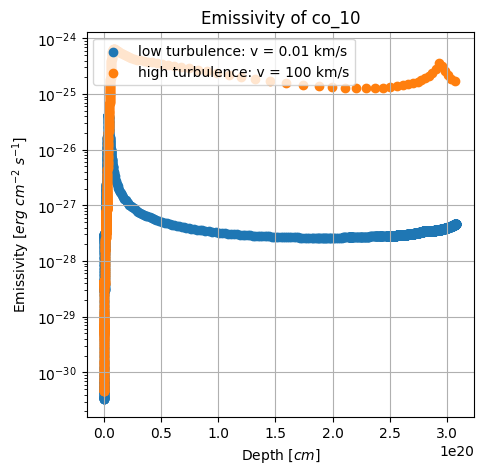

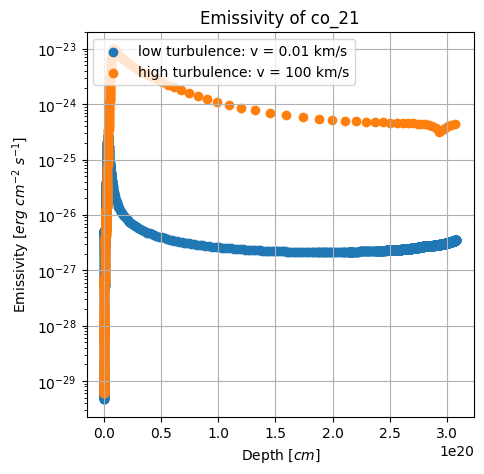

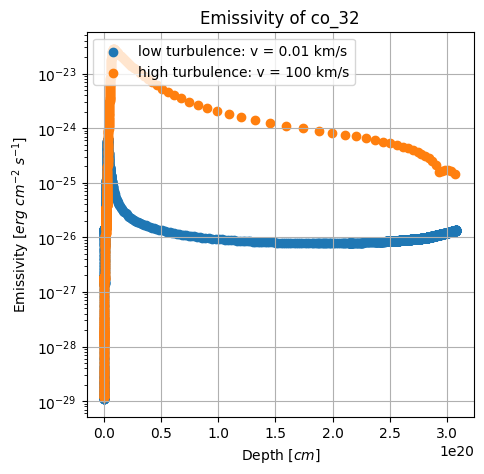

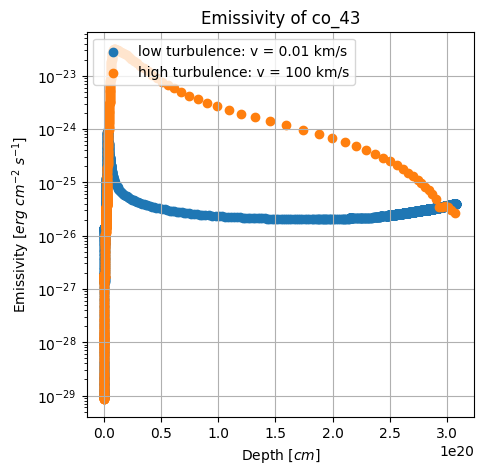

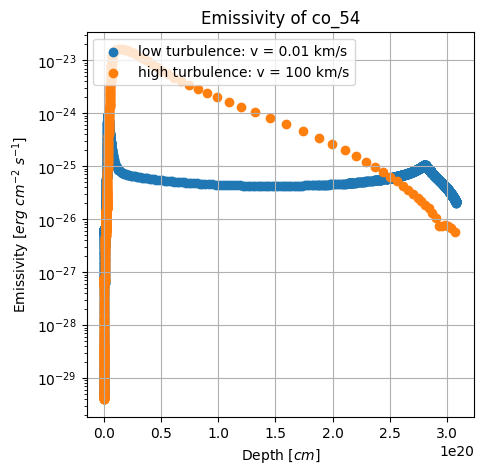

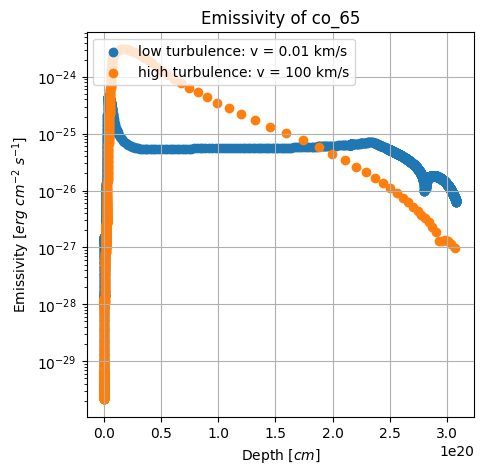

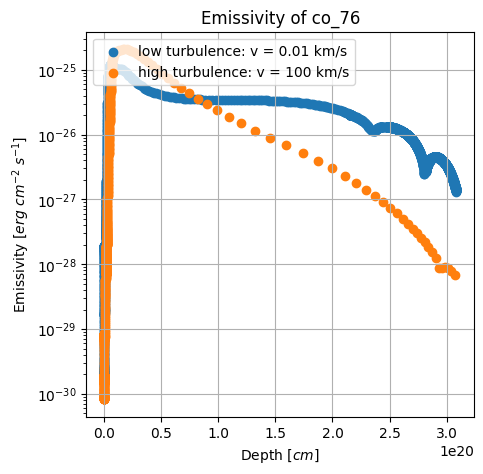

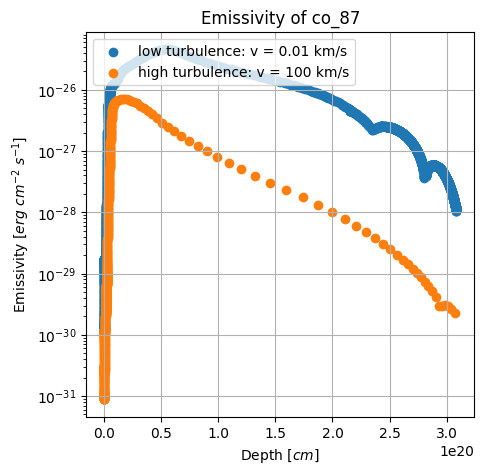

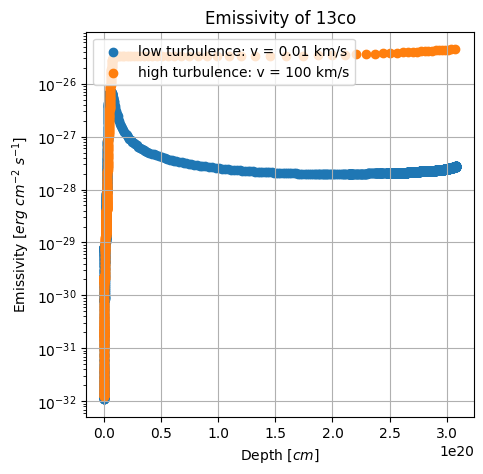

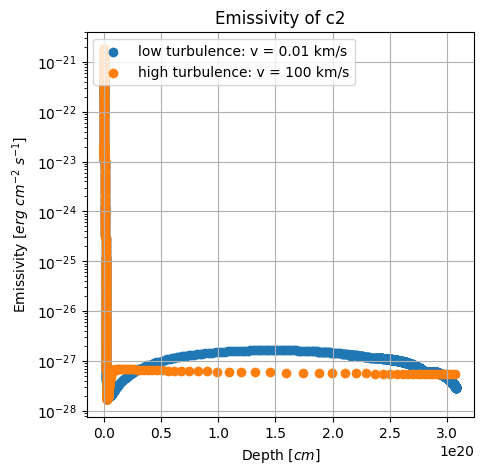

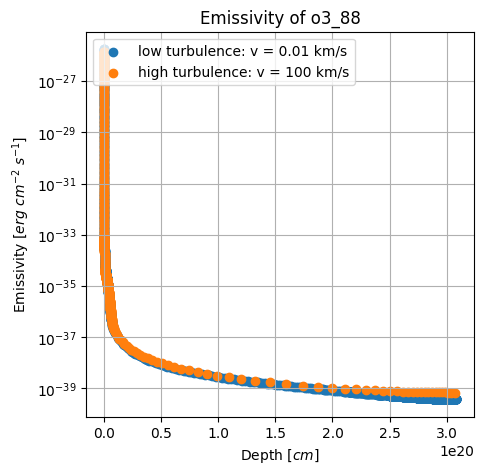

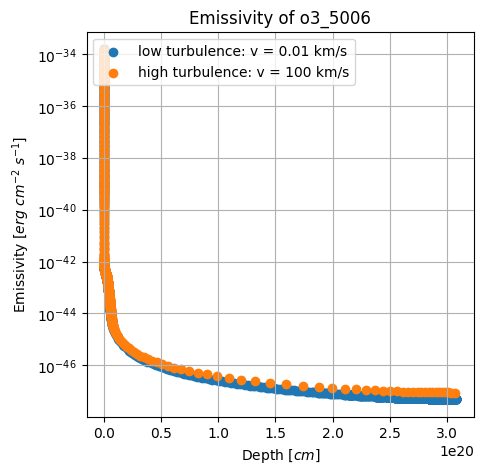

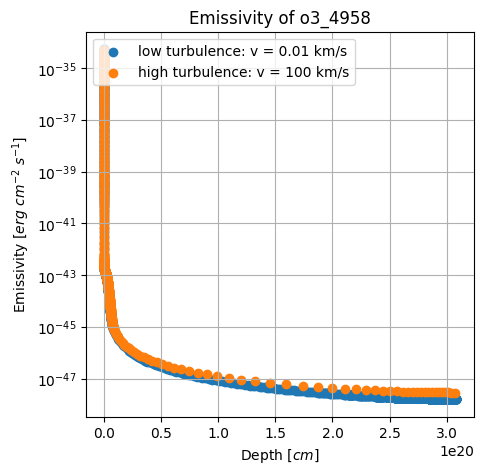

In [7]:

for line_name in ['lya', 'ha', 'hb', 'co_10', 'co_21', 'co_32', 'co_43', 'co_54', 'co_65', 'co_76', 'co_87', '13co', 'c2', 'o3_88', 'o3_5006', 'o3_4958']:
    plt.figure(figsize=(5,5), dpi=100)
    plt.scatter(low['depth'], low[line_name], label=f"low turbulence: v = 0.01 km/s")
    plt.scatter(high['depth'], high[line_name], label="high turbulence: v = 100 km/s")

    plt.xlabel(r"Depth [$cm$]")
    plt.ylabel(r"Emissivity [$erg$ $cm^{-2}$ $s^{-1}$]")
    plt.title(f"Emissivity of {line_name}")

    # plt.xscale("log")
    plt.yscale("log")
    plt.grid(True)
    plt.legend(loc="upper left")
    plt.show()

plt.show()

In [8]:
# Print the calculated flux values
def find_indices_of_the_run(line_fluxes, file_props):
    index = np.where(
        (line_fluxes['hden'] == np.round(file_props['log_hden'], 1)) &
        (line_fluxes['metallicity'] == np.round(file_props['log_metallicity'], 1)) &
        (line_fluxes['turbulence'] == np.round(file_props['log_turbulence'], 1)) &
        (line_fluxes['isrf'] == np.round(file_props['log_isrf'], 1)) &
        (line_fluxes['radius'] == np.round(file_props['log_radius'], 1))
    )[0]
    
    return index

index1 = find_indices_of_the_run(line_fluxes, file_props=file_props_1)
index2 = find_indices_of_the_run(line_fluxes, file_props=file_props_2)

# Show exponential pandas formatting
pd.options.display.float_format = '{:.2e}'.format
pd.set_option('display.max_columns', None)
print(f"{line_fluxes.iloc[index1][['hden', 'metallicity', 'turbulence', 'isrf', 'radius', 'co_10', 'co_21', 'co_32', 'co_43', 'co_54', 'co_65', 'co_76', 'co_87']]}")
print("\n")
print(f"{line_fluxes.iloc[index2][['hden', 'metallicity', 'turbulence', 'isrf', 'radius', 'co_10', 'co_21', 'co_32', 'co_43', 'co_54', 'co_65', 'co_76', 'co_87']]}")
# Change it to default
pd.reset_option('display.float_format')


           hden  metallicity  turbulence      isrf   radius    co_10    co_21  \
118375 2.00e+00     1.00e+00   -2.00e+00 -5.00e-01 2.00e+00 2.16e-07 1.58e-06   

          co_32    co_43    co_54    co_65    co_76    co_87  
118375 4.82e-06 1.05e-05 1.84e-05 1.77e-05 9.70e-06 4.84e-06  


           hden  metallicity  turbulence      isrf   radius    co_10    co_21  \
119299 2.00e+00     1.00e+00    2.00e+00 -5.00e-01 2.00e+00 6.93e-05 4.29e-04   

          co_32    co_43    co_54    co_65    co_76    co_87  
119299 9.45e-04 1.23e-03 8.17e-04 1.56e-04 1.05e-05 3.58e-07  


In [9]:
# Show exponential pandas formatting
pd.options.display.float_format = '{:.2e}'.format
pd.set_option('display.max_columns', None)
print(f"{line_fluxes.iloc[index1][['hden', 'metallicity', 'turbulence', 'isrf', 'radius', 'lya', 'ha', 'hb', 'c2', 'o3_88', 'o3_5006', 'o3_4958']]}")
print("\n")
print(f"{line_fluxes.iloc[index2][['hden', 'metallicity', 'turbulence', 'isrf', 'radius', 'lya', 'ha', 'hb', 'c2', 'o3_88', 'o3_5006', 'o3_4958']]}")
# Change it to default
pd.reset_option('display.float_format')


           hden  metallicity  turbulence      isrf   radius      lya       ha  \
118375 2.00e+00     1.00e+00   -2.00e+00 -5.00e-01 2.00e+00 2.82e-05 4.23e-06   

             hb       c2    o3_88  o3_5006  o3_4958  
118375 1.31e-06 1.81e-05 3.01e-11 2.36e-19 7.91e-20  


           hden  metallicity  turbulence      isrf   radius      lya       ha  \
119299 2.00e+00     1.00e+00    2.00e+00 -5.00e-01 2.00e+00 3.19e-05 4.85e-06   

             hb       c2    o3_88  o3_5006  o3_4958  
119299 1.53e-06 2.04e-05 2.20e-11 2.08e-19 6.99e-20  
